### Keras CNN Model for MNIST

In [1]:
## Import Packages and Modules

import numpy as np
import scipy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

c:\users\samorris\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
### load data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
sample_image = X_train[4]
sample_image.shape

(28, 28)

In [4]:
### Sample one of the data points
from matplotlib import pyplot as plt
sample_image = X_train[4]
sample_image_reshape = sample_image.reshape((28,28))
plt.imshow(sample_image_reshape, cmap='gray')


In [5]:
plt.show()

In [6]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0],1,28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0],1,28,28).astype('float32')

In [7]:
# Normalise input data
X_train = X_train/255
X_test = X_test/255

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
### Build Model
pooling = (2,2)

def cnn_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1,28,28), activation='relu'))
    model.add(MaxPooling2D(pool_size=pooling))
    model.add(Conv2D(15,(3,3), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    

In [10]:
## Train the model

model = cnn_model()
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10, batch_size = 200)
scores = model.evaluate(X_test, y_test, verbose = 0)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.2986 - acc: 0.9106 - val_loss: 0.0776 - val_acc: 0.9777: 0.3275 - acc
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0783 - acc: 0.9759 - val_loss: 0.0464 - val_acc: 0.9855
Epoch 3/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0555 - acc: 0.9825 - val_loss: 0.0404 - val_acc: 0.9872
Epoch 4/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0437 - acc: 0.9866 - val_loss: 0.0329 - val_acc: 0.9890
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0366 - acc: 0.9884 - val_loss: 0.0318 - val_acc: 0.9904
Epoch 6/10
60000/60000 [========

In [11]:
final_error = (100-scores[1]*100)
print("Accuracy: %.4f%%" % scores[1])

Accuracy: 0.9913%


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 10, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1500)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               192128    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                6450      
__________

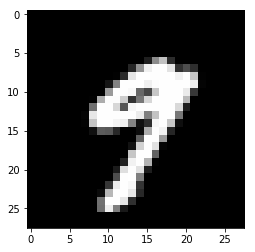

In [13]:
## Test Cases
sample_image = X_test[20]
sample_image_reshape = sample_image.reshape((28,28))
plt.imshow(sample_image_reshape, cmap='gray')
plt.show()


In [34]:
test_case = X_test[20]
test_case_shape = test_case.reshape(test_case.shape[0],1,28,28).astype('float32')
results = model.predict_classes(test_case_shape)
print("I believe this is a:", results)

I believe this is a: [9]


### So now let's load some images from file that the model has never seen and let's see how it goes in identifying them, I made a small function to do this, as it saves repeating yourself over and over if you want to do a lot of test cases

### Resizing and making you own images can be a nightmare, I suggest finding a converter or helper script to make your own images, I am working on one to convert images, until then I am using Windows Paint

In [78]:
from PIL import Image
import numpy as np

In [79]:
def test_cases(imagepath):
    img = Image.open(imagepath)
    test_image = np.array(img)
    plt.imshow(test_image, cmap='gray')
    image_reshape = test_image.reshape(test_case.shape[0],1,28,28).astype('float32')
    results_test_case = model.predict_classes(image_reshape)
    print("I believe this is a:", results_test_case)

I believe this is a: [1]


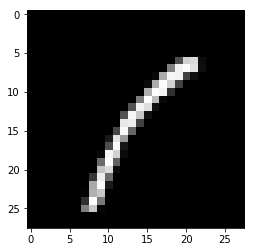

In [80]:
test_cases("test_1.png")

I believe this is a: [0]


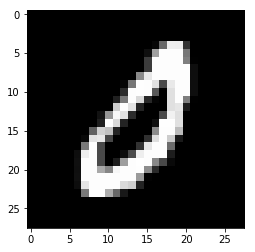

In [81]:
test_cases("test_2.png")

I believe this is a: [1]


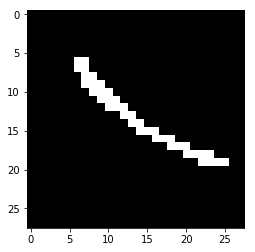

In [84]:
test_cases("test_3.bmp")

I believe this is a: [8]


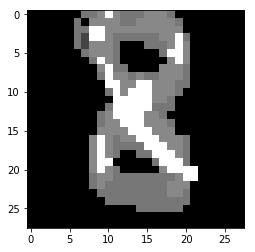

In [87]:
test_cases("test_4.bmp")